In [18]:
#Importing the Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [19]:
#loading the dataset
df = pd.read_csv("C:/Users/Mega Store/Desktop/advertising.csv")

# EDA

In [20]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [24]:
print(df.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [25]:
df.drop_duplicates(inplace=True)

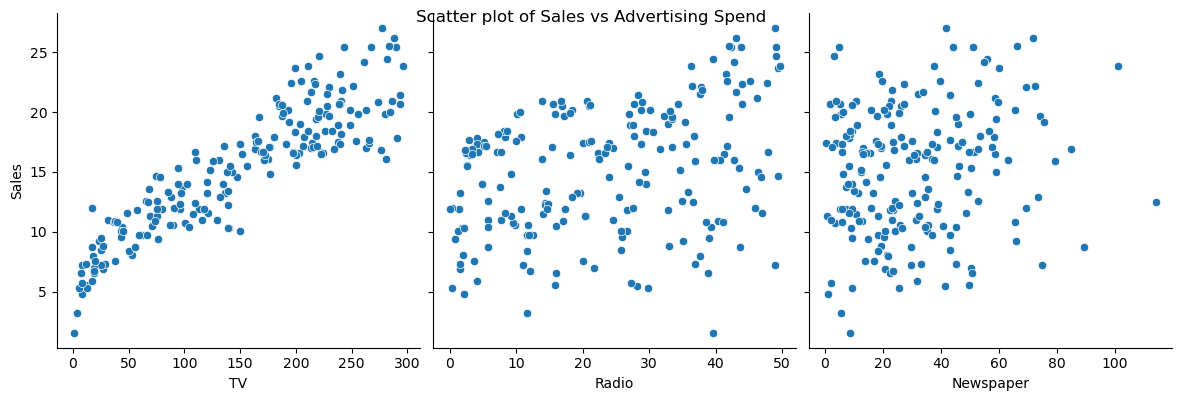

In [26]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Scatter plot of Sales vs Advertising Spend')
plt.show()

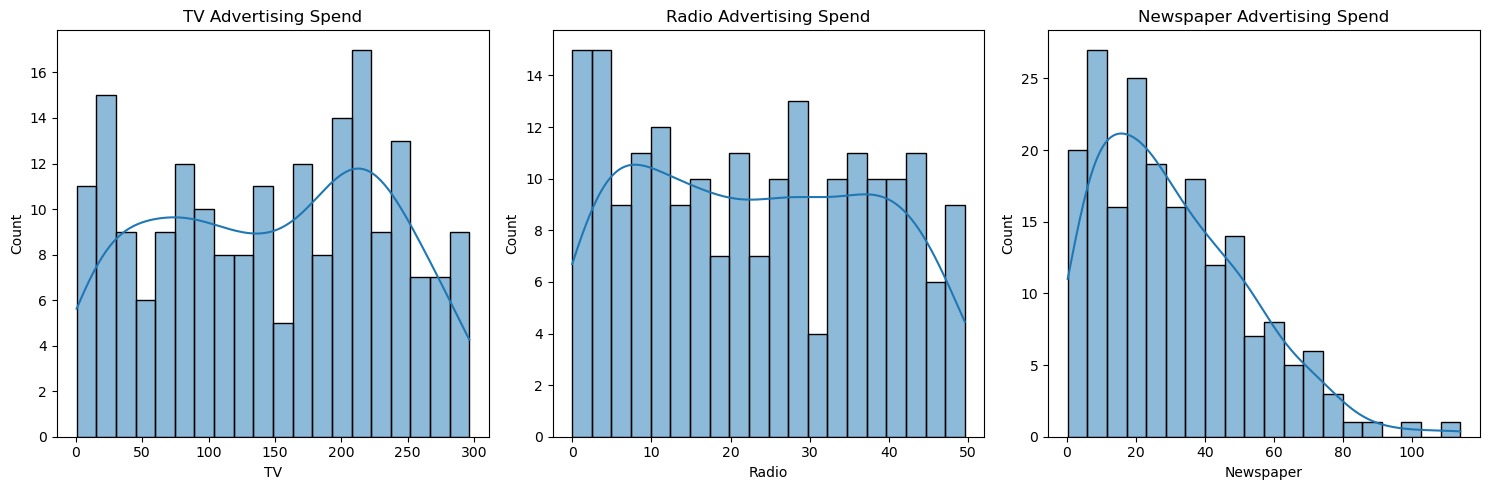

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['TV'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('TV Advertising Spend')
sns.histplot(df['Radio'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Radio Advertising Spend')
sns.histplot(df['Newspaper'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('Newspaper Advertising Spend')
plt.tight_layout()
plt.show()


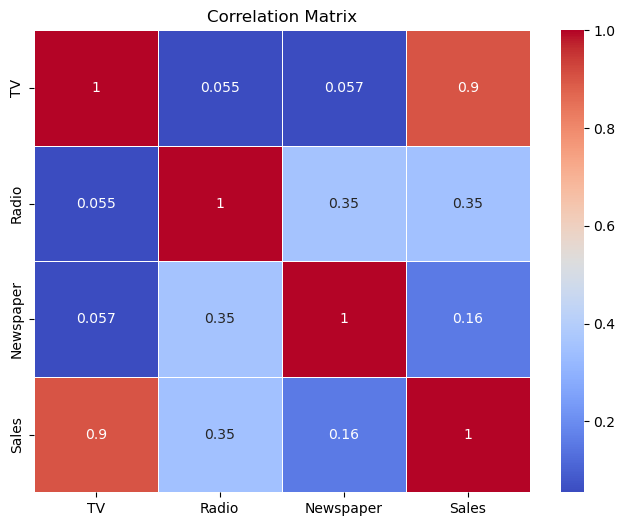

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data preprocessing

In [29]:
# Prepare data for modeling
X = df['TV'].values.reshape(-1, 1)  # Use TV advertising budget as predictor
y = df['Sales'].values

In [30]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# LinearRegression

In [31]:
# Train the Linear Regression model
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluating

In [34]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 5.179525402166653


In [35]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²) Score: {r2}')

R-squared (R²) Score: 0.814855389208679


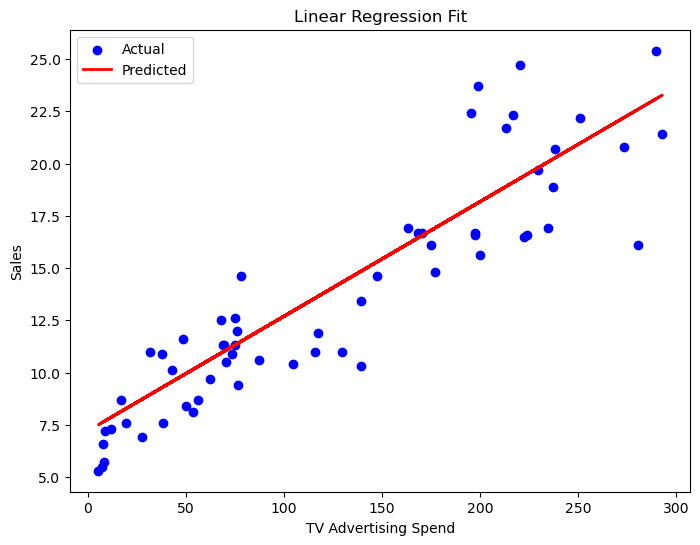

In [36]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()